## 1. Load the dataset

[뉴욕 승차공유 플랫폼 탑승 데이터](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_hvfhs.pdf)

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, StrMethodFormatter

df = pd.read_csv('./data/fhvhv_tripdata_2023.csv')

In [2]:
pd.set_option('float_format', '{:.2f}'.format)

df.info() # 전체 데이터 정보와 결측치 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526670 entries, 0 to 1526669
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   hvfhs_license_num     1526670 non-null  object 
 1   dispatching_base_num  1526670 non-null  object 
 2   originating_base_num  1103720 non-null  object 
 3   request_datetime      1526670 non-null  object 
 4   on_scene_datetime     1103720 non-null  object 
 5   pickup_datetime       1526670 non-null  object 
 6   dropoff_datetime      1526670 non-null  object 
 7   PULocationID          1526670 non-null  int64  
 8   DOLocationID          1526670 non-null  int64  
 9   trip_miles            1526670 non-null  float64
 10  trip_time             1526670 non-null  int64  
 11  base_passenger_fare   1526670 non-null  float64
 12  tolls                 1526670 non-null  float64
 13  bcf                   1526670 non-null  float64
 14  sales_tax             1526670 non-

## 2. Data description

In [3]:
df.describe() # 데이터의 기초 통계량 확인 가능

,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,1526670.00,1526670.00,1526670.00,1526670.00,1526670.00,1526670.00,1526670.00,1526670.00,1526670.00,1526670.00,1526670.00,1526670.00
mean,138.86,142.33,5.04,1165.56,23.90,1.10,0.74,2.02,1.10,0.20,1.09,18.96
std,74.79,77.79,5.86,829.85,20.19,3.87,0.67,1.66,1.34,0.68,3.11,16.21
min,2.00,1.00,0.00,1.00,-114.57,0.00,0.00,0.00,0.00,0.00,0.00,-42.92
25%,75.00,76.00,1.59,594.00,11.57,0.00,0.34,0.96,0.00,0.00,0.00,8.55
50%,140.00,141.00,3.00,949.00,18.03,0.00,0.53,1.53,0.00,0.00,0.00,14.20
75%,210.00,217.00,6.26,1493.00,29.17,0.00,0.89,2.52,2.75,0.00,0.00,23.75
max,265.00,265.00,245.67,33102.00,806.57,86.55,33.11,60.38,5.50,6.90,149.72,828.76


In [4]:
# hvfhs_license_num: HVFHS; HV0003: Uber, HV0005: Lyft
# dispatching_base_num: B03404: Uber, B02835: Lyft
# originating_dispatch_base_num: B03404: Uber, B02835: Lyft
# requested_pickup_time: 요청한 픽업 시간
# on_scene_datetime: 픽업 장소에 도착한 시간
# pickup_datetime: 승차한 시간
# dropoff_datetime: 하차한 시간
# passenger_count: 승객 수
# PULocationID: 승차 위치 ID
# DOLocationID: 하차 위치 ID
# trip_miles: 여행한 거리
# trip_times: 여행한 시간
# base_passenger_fare: 기본 승객 요금
# tolls: 통행료
# bcf: black car fund
# sales_tax: 판매세
# congestion_surcharge: 혼잡료
# airport_fee: 공항 요금
# tips: 팁
# driver_pay: 드라이버의 총 지급액
# shared_request_flag: 승객이 공유 픽업에 동의했는지 여부
# shared_match_flag: 승객이 다른 승객과 공유되었는지 여부
# access_a_ride_flag: MTA를 대신해 승객을 태웠는지 여부
# wav_request_flag: 승객이 휠체어 접근 가능한 차량을 요청했는지 여부
# wav_matched_flag: 승객이 휠체어 접근 가능한 차량을 탔는지 여부

In [5]:
df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-01-27 15:12:24,2023-01-27 15:15:36,2023-01-27 15:17:24,2023-01-27 15:29:27,18,32,1.94,...,0.65,0.00,0.00,10.00,9.40,N,N,,N,N
1,HV0003,B03404,B03404,2023-01-07 01:51:14,2023-01-07 01:54:29,2023-01-07 01:54:41,2023-01-07 02:03:19,244,69,2.60,...,1.16,0.00,0.00,0.00,8.08,N,N,,N,N
2,HV0003,B03404,B03404,2023-01-19 14:56:50,2023-01-19 15:02:13,2023-01-19 15:02:30,2023-01-19 15:17:06,26,26,0.97,...,0.67,0.00,0.00,0.00,8.95,N,N,,N,N
3,HV0003,B03404,B03404,2023-01-22 16:53:54,2023-01-22 16:54:41,2023-01-22 16:54:55,2023-01-22 17:19:27,170,265,4.97,...,0.00,0.00,0.00,0.00,21.29,N,N,,N,N
4,HV0003,B03404,B03404,2023-01-11 09:38:17,2023-01-11 09:40:31,2023-01-11 09:42:18,2023-01-11 09:54:13,224,170,1.41,...,1.05,2.75,0.00,0.00,7.96,N,N,,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526665,HV0005,B03406,NaN,2023-08-14 23:34:54,NaN,2023-08-14 23:42:55,2023-08-14 23:57:07,260,255,4.99,...,1.56,0.00,0.00,0.00,14.68,N,N,N,N,N
1526666,HV0005,B03406,NaN,2023-08-13 11:04:59,NaN,2023-08-13 11:14:06,2023-08-13 11:39:00,138,137,8.80,...,3.97,2.75,2.50,0.00,28.12,N,N,N,N,N
1526667,HV0003,B03404,B03404,2023-08-03 23:43:06,2023-08-03 23:45:06,2023-08-03 23:46:45,2023-08-03 23:59:17,247,167,2.18,...,1.35,0.00,0.00,0.00,9.93,N,N,,N,N
1526668,HV0003,B03404,B03404,2023-08-20 09:39:12,2023-08-20 09:43:59,2023-08-20 09:44:31,2023-08-20 09:54:44,237,170,2.45,...,1.69,2.75,0.00,0.00,13.79,N,N,,N,N


## 3. Missing value check

In [6]:
missing_values = df.isnull().sum()
missing_values

hvfhs_license_num            0
dispatching_base_num         0
originating_base_num    422950
request_datetime             0
on_scene_datetime       422950
pickup_datetime              0
dropoff_datetime             0
PULocationID                 0
DOLocationID                 0
trip_miles                   0
trip_time                    0
base_passenger_fare          0
tolls                        0
bcf                          0
sales_tax                    0
congestion_surcharge         0
airport_fee                  0
tips                         0
driver_pay                   0
shared_request_flag          0
shared_match_flag            0
access_a_ride_flag           0
wav_request_flag             0
wav_match_flag               0
dtype: int64

In [7]:
# 결측치 대체
df['on_scene_datetime'].fillna('Unknown', inplace=True)

# 결측치 제거
df.dropna(subset=['on_scene_datetime'], inplace=True)

In [8]:
missing_values = df.isnull().sum()
missing_values

hvfhs_license_num            0
dispatching_base_num         0
originating_base_num    422950
request_datetime             0
on_scene_datetime            0
pickup_datetime              0
dropoff_datetime             0
PULocationID                 0
DOLocationID                 0
trip_miles                   0
trip_time                    0
base_passenger_fare          0
tolls                        0
bcf                          0
sales_tax                    0
congestion_surcharge         0
airport_fee                  0
tips                         0
driver_pay                   0
shared_request_flag          0
shared_match_flag            0
access_a_ride_flag           0
wav_request_flag             0
wav_match_flag               0
dtype: int64

## 4. Outlier check

In [9]:
# pickup_datetime을 datetime 형식으로 변환
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['month'] = df['pickup_datetime'].dt.to_period('M')

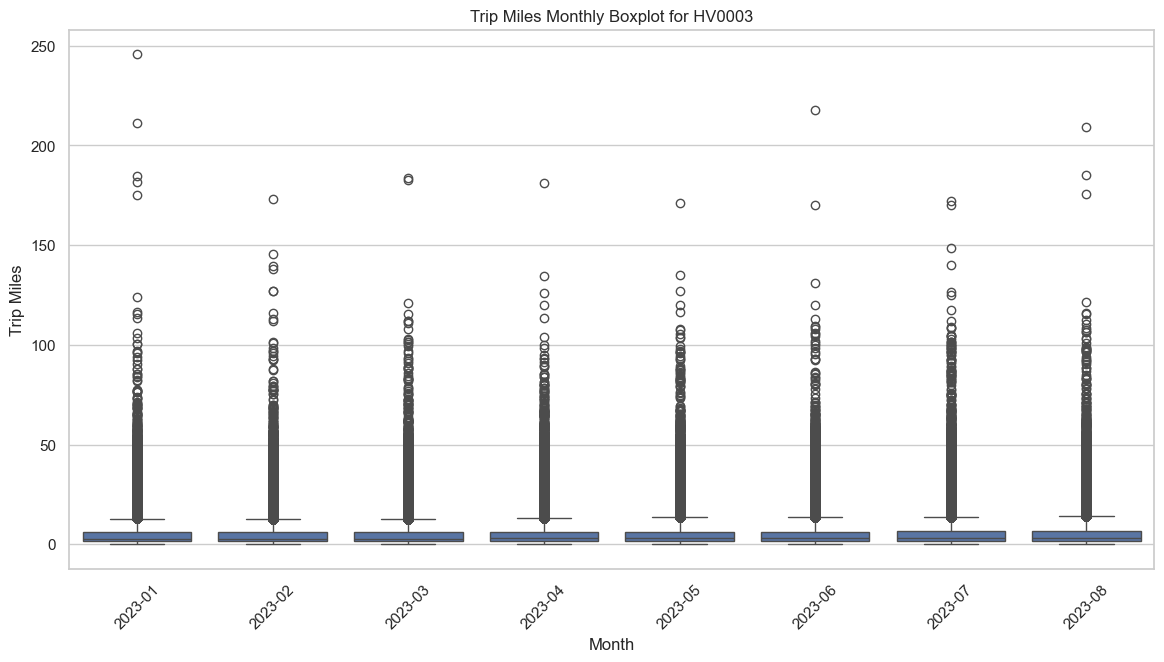

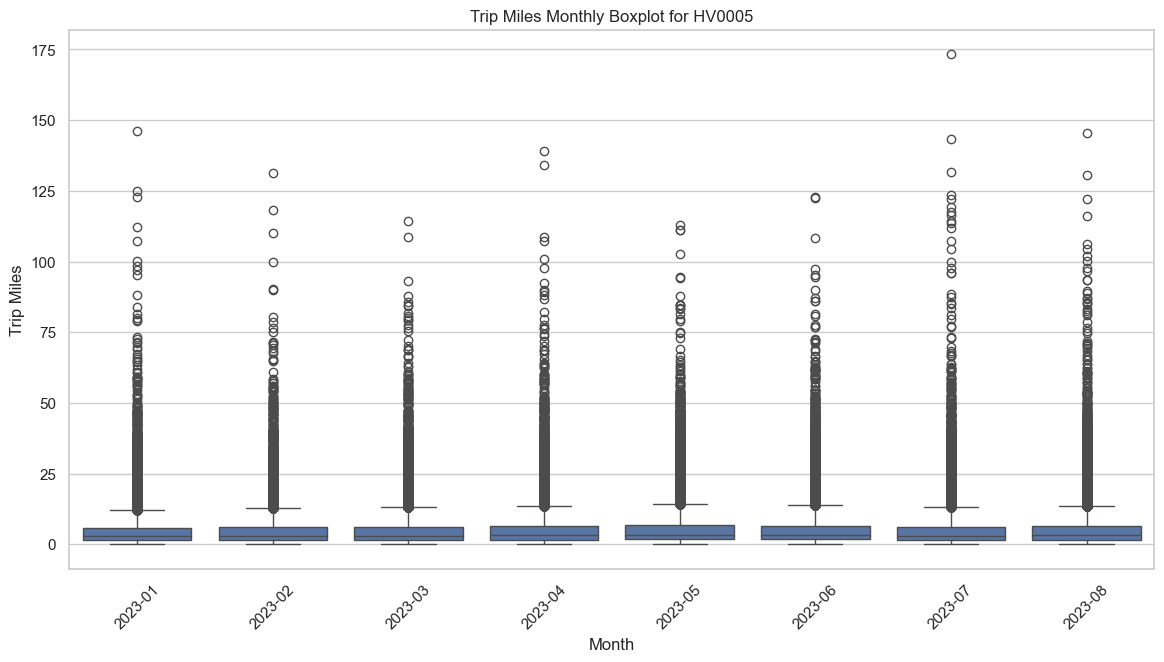

In [10]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# hvfhs_license_num별로 데이터를 나누어 각각 Boxplot을 그림
license_nums = ['HV0003', 'HV0005']

for license_num in license_nums:
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='month', y='trip_miles', data=df[df['hvfhs_license_num'] == license_num])
    plt.title(f'Trip Miles Monthly Boxplot for {license_num}')
    plt.xticks(rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Trip Miles')
    plt.show()

## 5. Data visualization

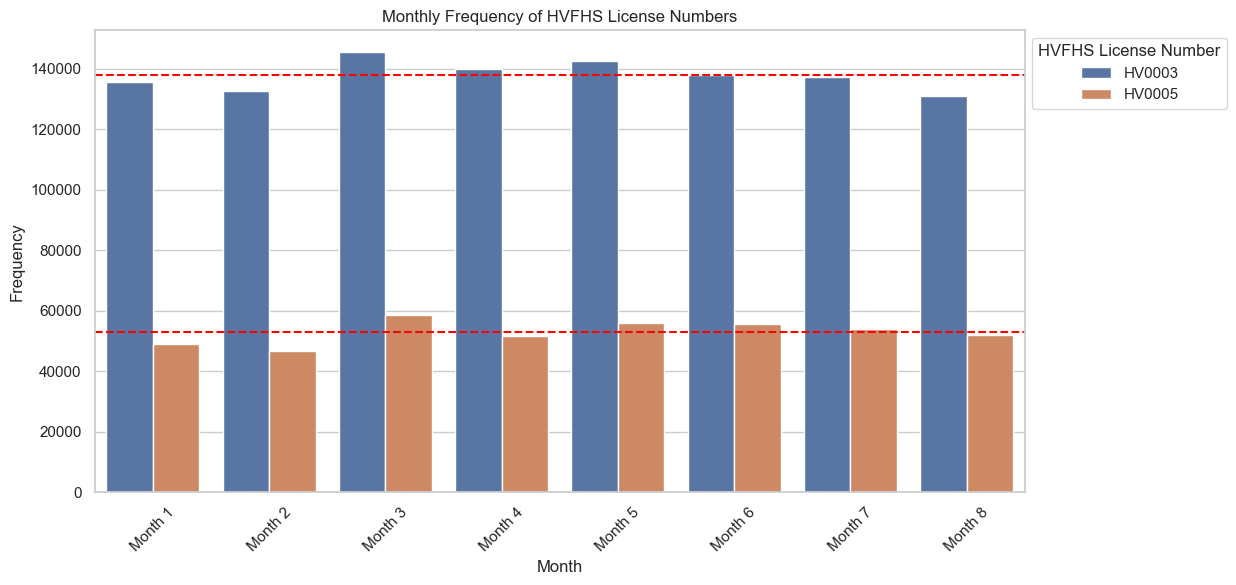

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 월별로 hvfhs_license_num의 빈도수 계산
df['month'] = pd.to_datetime(df['pickup_datetime']).dt.month
monthly_counts = df.groupby(['month', 'hvfhs_license_num']).size().reset_index(name='counts')

# 'month' 열을 문자열로 변환
monthly_counts['month'] = monthly_counts['month'].apply(lambda x: f'Month {x}')

# 단일 축 그래프를 사용하여 월별 빈도를 함께 표시
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_counts, x='month', y='counts', hue='hvfhs_license_num')

# 평균값에 대한 선 추가
average_counts = monthly_counts.groupby('hvfhs_license_num')['counts'].mean().reset_index()
for index, row in average_counts.iterrows():
    plt.axhline(y=row['counts'], color='red', linestyle='--')

plt.legend(title='HVFHS License Number', loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Monthly Frequency of HVFHS License Numbers')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

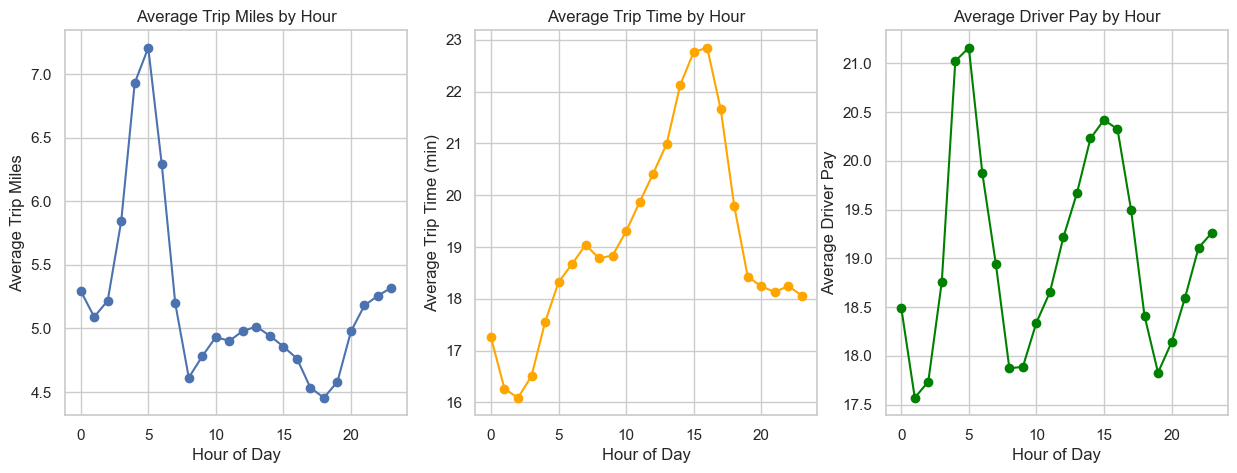

In [12]:
import matplotlib.pyplot as plt

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['trip_time_min'] = df['trip_time'] / 60
numeric_cols = ['trip_miles', 'trip_time_min', 'driver_pay']
grouped = df[numeric_cols].groupby(df['pickup_datetime'].dt.hour).mean()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(grouped['trip_miles'], marker='o')
plt.title('Average Trip Miles by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Miles')

plt.subplot(1, 3, 2)
plt.plot(grouped['trip_time_min'], marker='o', color='orange')
plt.title('Average Trip Time by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Time (min)')

plt.subplot(1, 3, 3)
plt.plot(grouped['driver_pay'], marker='o', color='green')
plt.title('Average Driver Pay by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Driver Pay')

plt.show()

## 6. Modeling

In [13]:
import pandas as pd

def assign_time_category(hour):
    if hour < 6:
        return 'dawn'
    elif 6 <= hour < 10:
        return 'morning'
    elif 10 <= hour < 16:
        return 'afternoon'
    elif 16 <= hour < 20:
        return 'evening'
    else:
        return 'night'

def filter_and_group_by_time_and_license(df, license_num):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['time_category'] = df['pickup_datetime'].dt.hour.apply(assign_time_category)

    filtered_grouped = df[df['hvfhs_license_num'] == license_num].groupby('time_category')
    return filtered_grouped

# Example usage
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']) # Assuming df is your DataFrame
uber_groups = filter_and_group_by_time_and_license(df, 'HV0003')
lyft_groups = filter_and_group_by_time_and_license(df, 'HV0005')

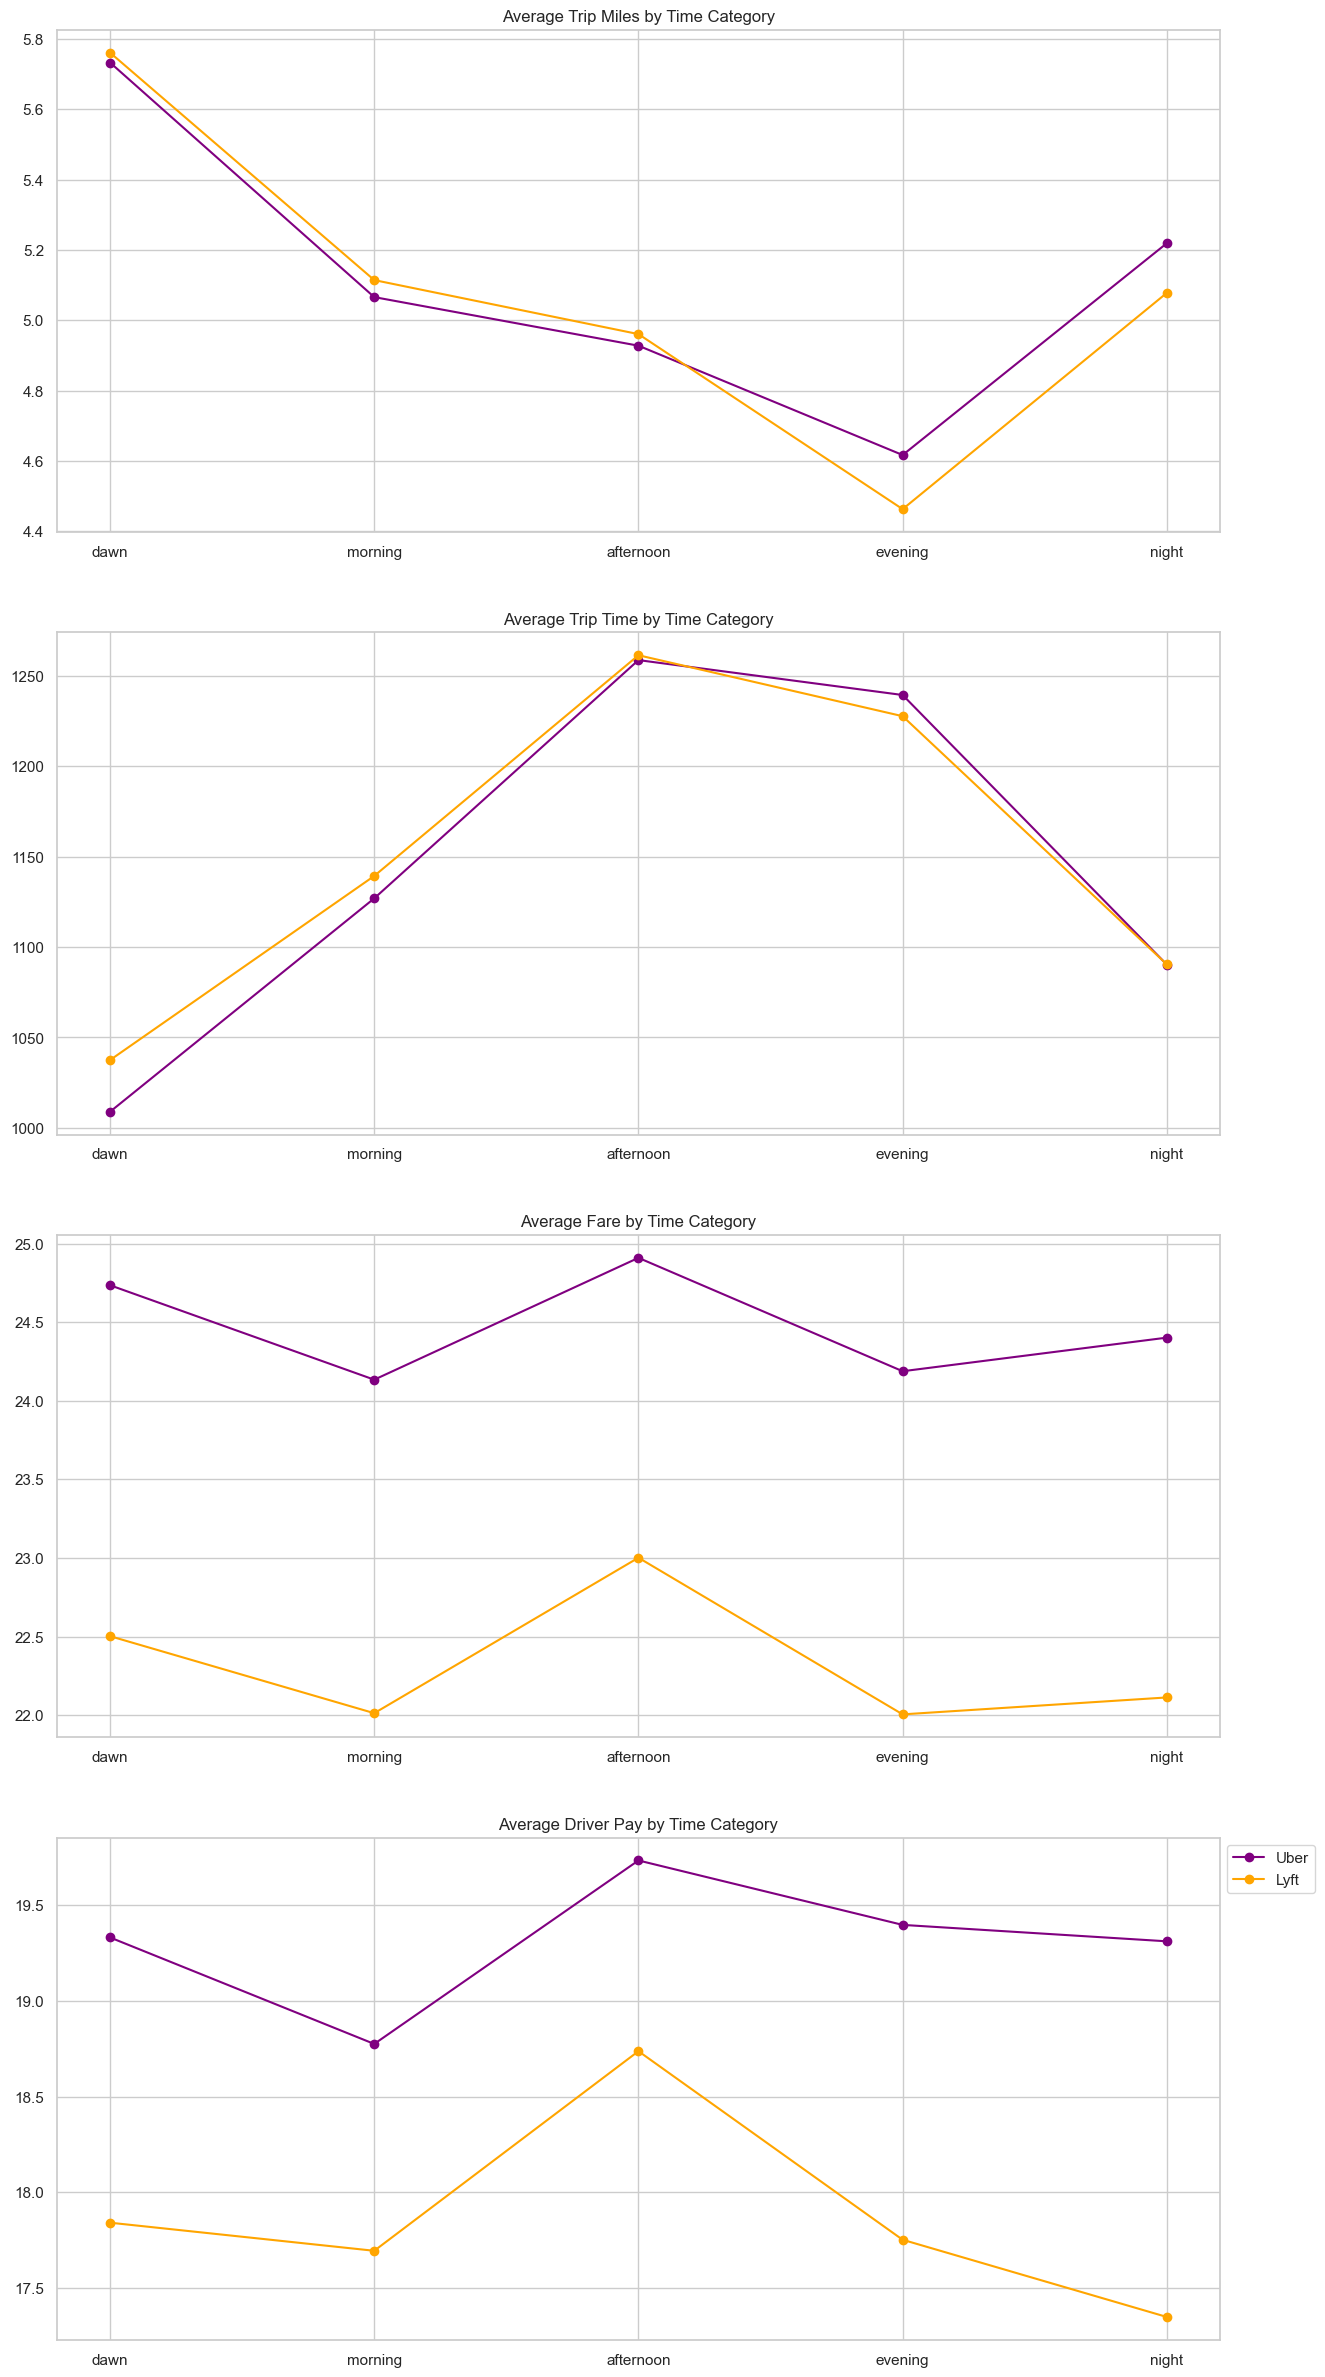

In [14]:
plt.figure(figsize=(15, 30))

sorted_time_categories = ['dawn', 'morning', 'afternoon', 'evening', 'night']
uber_avg_trip_miles = uber_groups['trip_miles'].mean().reindex(sorted_time_categories)
uber_avg_trip_time = uber_groups['trip_time'].mean().reindex(sorted_time_categories)
uber_avg_fare = uber_groups['base_passenger_fare'].mean().reindex(sorted_time_categories)
uber_driver_pay = uber_groups['driver_pay'].mean().reindex(sorted_time_categories)

lyft_avg_trip_miles = lyft_groups['trip_miles'].mean().reindex(sorted_time_categories)
lyft_avg_trip_time = lyft_groups['trip_time'].mean().reindex(sorted_time_categories)
lyft_avg_fare = lyft_groups['base_passenger_fare'].mean().reindex(sorted_time_categories)
lyft_driver_pay = lyft_groups['driver_pay'].mean().reindex(sorted_time_categories)

plt.subplot(4, 1, 1)
plt.plot(uber_avg_trip_miles, marker='o', color='purple')
plt.plot(lyft_avg_trip_miles, marker='o', color='orange')
plt.title('Average Trip Miles by Time Category')

plt.subplot(4, 1, 2)
plt.plot(uber_avg_trip_time, marker='o', color='purple')
plt.plot(lyft_avg_trip_time, marker='o', color='orange')
plt.title('Average Trip Time by Time Category')

plt.subplot(4, 1, 3)
plt.plot(uber_avg_fare, marker='o', color='purple')
plt.plot(lyft_avg_fare, marker='o', color='orange')
plt.title('Average Fare by Time Category')

plt.subplot(4, 1, 4)
plt.plot(uber_driver_pay, marker='o', color='purple')
plt.plot(lyft_driver_pay, marker='o', color='orange')
plt.title('Average Driver Pay by Time Category')

plt.legend(['Uber', 'Lyft'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [17]:
uber_avg_trip_miles, uber_avg_trip_time, uber_avg_fare, uber_driver_pay

(time_category
 dawn        5.73
 morning     5.07
 afternoon   4.93
 evening     4.62
 night       5.22
 Name: trip_miles, dtype: float64,
 time_category
 dawn        1008.96
 morning     1126.87
 afternoon   1258.53
 evening     1239.24
 night       1090.24
 Name: trip_time, dtype: float64,
 time_category
 dawn        24.73
 morning     24.13
 afternoon   24.91
 evening     24.19
 night       24.40
 Name: base_passenger_fare, dtype: float64,
 time_category
 dawn        19.33
 morning     18.78
 afternoon   19.73
 evening     19.40
 night       19.31
 Name: driver_pay, dtype: float64)

In [18]:
lyft_avg_trip_miles, lyft_avg_trip_time, lyft_avg_fare, lyft_driver_pay

(time_category
 dawn        5.76
 morning     5.11
 afternoon   4.96
 evening     4.46
 night       5.08
 Name: trip_miles, dtype: float64,
 time_category
 dawn        1037.52
 morning     1139.25
 afternoon   1261.21
 evening     1227.53
 night       1090.37
 Name: trip_time, dtype: float64,
 time_category
 dawn        22.50
 morning     22.01
 afternoon   23.00
 evening     22.01
 night       22.11
 Name: base_passenger_fare, dtype: float64,
 time_category
 dawn        17.84
 morning     17.69
 afternoon   18.74
 evening     17.75
 night       17.35
 Name: driver_pay, dtype: float64)

In [16]:
df['time_category'] = df['pickup_datetime'].dt.hour.apply(assign_time_category)

# 시간대 카테고리를 Categorical 타입으로 변환하고 정렬
sorted_time_categories = ['dawn', 'morning', 'afternoon', 'evening', 'night']
df['time_category'] = pd.Categorical(df['time_category'], categories=sorted_time_categories, ordered=True)

In [19]:
df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,month,trip_time_min,time_category
0,HV0003,B03404,B03404,2023-01-27 15:12:24,2023-01-27 15:15:36,2023-01-27 15:17:24,2023-01-27 15:29:27,18,32,1.94,...,10.00,9.40,N,N,,N,N,1,12.05,afternoon
1,HV0003,B03404,B03404,2023-01-07 01:51:14,2023-01-07 01:54:29,2023-01-07 01:54:41,2023-01-07 02:03:19,244,69,2.60,...,0.00,8.08,N,N,,N,N,1,8.63,dawn
2,HV0003,B03404,B03404,2023-01-19 14:56:50,2023-01-19 15:02:13,2023-01-19 15:02:30,2023-01-19 15:17:06,26,26,0.97,...,0.00,8.95,N,N,,N,N,1,14.60,afternoon
3,HV0003,B03404,B03404,2023-01-22 16:53:54,2023-01-22 16:54:41,2023-01-22 16:54:55,2023-01-22 17:19:27,170,265,4.97,...,0.00,21.29,N,N,,N,N,1,24.53,evening
4,HV0003,B03404,B03404,2023-01-11 09:38:17,2023-01-11 09:40:31,2023-01-11 09:42:18,2023-01-11 09:54:13,224,170,1.41,...,0.00,7.96,N,N,,N,N,1,11.92,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526665,HV0005,B03406,NaN,2023-08-14 23:34:54,Unknown,2023-08-14 23:42:55,2023-08-14 23:57:07,260,255,4.99,...,0.00,14.68,N,N,N,N,N,8,14.20,night
1526666,HV0005,B03406,NaN,2023-08-13 11:04:59,Unknown,2023-08-13 11:14:06,2023-08-13 11:39:00,138,137,8.80,...,0.00,28.12,N,N,N,N,N,8,24.90,afternoon
1526667,HV0003,B03404,B03404,2023-08-03 23:43:06,2023-08-03 23:45:06,2023-08-03 23:46:45,2023-08-03 23:59:17,247,167,2.18,...,0.00,9.93,N,N,,N,N,8,12.53,night
1526668,HV0003,B03404,B03404,2023-08-20 09:39:12,2023-08-20 09:43:59,2023-08-20 09:44:31,2023-08-20 09:54:44,237,170,2.45,...,0.00,13.79,N,N,,N,N,8,10.22,morning


In [ ]:
# hvfhs_license_num: HVFHS; HV0003: Uber, HV0005: Lyft
# dispatching_base_num: B03404: Uber, B02835: Lyft
# originating_dispatch_base_num: B03404: Uber, B02835: Lyft
# requested_pickup_time: 요청한 픽업 시간
# on_scene_datetime: 픽업 장소에 도착한 시간
# pickup_datetime: 승차한 시간
# dropoff_datetime: 하차한 시간
# passenger_count: 승객 수
# PULocationID: 승차 위치 ID
# DOLocationID: 하차 위치 ID
# trip_miles: 여행한 거리
# trip_times: 여행한 시간
# base_passenger_fare: 기본 승객 요금
# tolls: 통행료
# bcf: black car fund
# sales_tax: 판매세
# congestion_surcharge: 혼잡료
# airport_fee: 공항 요금
# tips: 팁
# driver_pay: 드라이버의 총 지급액
# shared_request_flag: 승객이 공유 픽업에 동의했는지 여부
# shared_match_flag: 승객이 다른 승객과 공유되었는지 여부
# access_a_ride_flag: MTA를 대신해 승객을 태웠는지 여부
# wav_request_flag: 승객이 휠체어 접근 가능한 차량을 요청했는지 여부
# wav_matched_flag: 승객이 휠체어 접근 가능한 차량을 탔는지 여부

In [20]:
features = ['PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 'base_passenger_fare', 
            'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips', 'time_category']

X = df[features]
y = df['driver_pay']

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 수치형 및 범주형 특성 구분
numeric_features = ['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips']
categorical_features = ['PULocationID', 'DOLocationID', 'time_category']

# 전처리 파이프라인 설정
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [23]:
# 전체 파이프라인 설정 (전처리 + 모델)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 모델 훈련
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')